### Importing Libraries

In [2]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
# import matplotlib
# matplotlib.use('TkAgg') 
drive.mount('/content/drive')
# !pip install hdbscan
# !pip install umap
# !pip install umap-learn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Data

In [ ]:
# Loading train data
path = '/content/drive/MyDrive/Capstone/Features_Data.csv'
train_df = pd.read_csv(path)
print("Train Data: ", train_df.shape)
response_df = train_df[['Response', 'new_response']]
train_df = train_df.drop(['Response', 'new_response'], axis=1)

Train Data:  (59381, 136)


In [ ]:
#Using HDBScan to perform clustering over the complete data
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000)
clusterer.fit(train_df)

HDBSCAN(min_cluster_size=1000)

In [ ]:
# Collecting the cluster labels
labels = clusterer.labels_

# Using UMAP to reduce the dimension of the data
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
train_x = reducer.fit_transform(np.array(train_df))

plot_df = pd.DataFrame(train_x, columns=['x', 'y'])
plot_df['label'] = labels
plot_df['label'] = plot_df['label'].map(str)

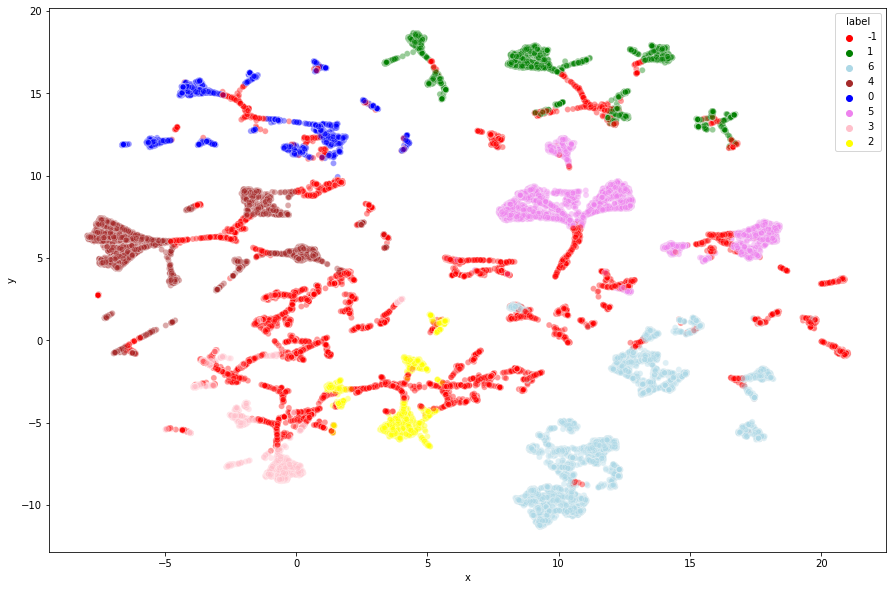

In [ ]:
# Visualizing the cluster.
color_dict = {'-1':'red', '0': 'blue', '1':'green', '2':'yellow', '3':'pink',
              '4': 'brown', '5':'violet', '6':'lightblue'}

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(data=plot_df, x="x", y="y", hue='label', palette=color_dict, 
                alpha=0.4)
plt.show()

In [ ]:
# Understing the cluster distribution
plot_df['label'].value_counts()/len(plot_df)*100

-1    23.297014
6     20.046816
5     15.951230
4     12.724609
1      9.432310
0      7.113386
3      5.828464
2      5.606170
Name: label, dtype: float64

We performed Clustering using density-based clustering like HDBScan, to validate if users grouped together are directly comparable to the risk level they belong to. UMAP is popularly used to visualize the results along with HDBScan as seen in the plot, we wanted to observe if we can prominently see the clusters.

To our disappointment, around 24% of the data was classified as outliers, out of which 22% were high risk applicants. Choosing clustering parameters was challenging. Further looking at the biggest cluster (i.e. Cluster 6)
with 20% of the data we observed that 21% of the points belonged to high risk, 36% belonged to medium risk and 41% belonged to low risk.